# Predicting Student Performance
### Preprocessing Data and Exploratory Analysis

Data is the Student Performance data set from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# testing parameters for xgboost using GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [44]:
math_stu = pd.read_csv("/Users/connorpatrom/introToDataScience/project/data/student-mat.csv", sep=";")
portu_stu = pd.read_csv("/Users/connorpatrom/introToDataScience/project/data/student-por.csv", sep=";")

In [45]:
merged_data = pd.concat([math_stu, portu_stu])

In [46]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [47]:
[merged_data[col].unique() for col in math_stu.columns if math_stu[col].dtype == 'object']  # checking for unique values in object columns

[array(['GP', 'MS'], dtype=object),
 array(['F', 'M'], dtype=object),
 array(['U', 'R'], dtype=object),
 array(['GT3', 'LE3'], dtype=object),
 array(['A', 'T'], dtype=object),
 array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
 array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object),
 array(['course', 'other', 'home', 'reputation'], dtype=object),
 array(['mother', 'father', 'other'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [48]:
label_encoder = LabelEncoder() # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
for col in merged_data.select_dtypes(include='object'):
    merged_data[col] = label_encoder.fit_transform(merged_data[col])

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      1044 non-null   int64
 1   sex         1044 non-null   int64
 2   age         1044 non-null   int64
 3   address     1044 non-null   int64
 4   famsize     1044 non-null   int64
 5   Pstatus     1044 non-null   int64
 6   Medu        1044 non-null   int64
 7   Fedu        1044 non-null   int64
 8   Mjob        1044 non-null   int64
 9   Fjob        1044 non-null   int64
 10  reason      1044 non-null   int64
 11  guardian    1044 non-null   int64
 12  traveltime  1044 non-null   int64
 13  studytime   1044 non-null   int64
 14  failures    1044 non-null   int64
 15  schoolsup   1044 non-null   int64
 16  famsup      1044 non-null   int64
 17  paid        1044 non-null   int64
 18  activities  1044 non-null   int64
 19  nursery     1044 non-null   int64
 20  higher      1044 non-null   int

In [49]:
bi_class = np.where(merged_data['G3'] <= 10, 0, 1) # creating binary class for response variable

In [50]:
testing_df = merged_data.drop('G3', axis=1)
testing_df["G3-Bi"] = bi_class

In [51]:
scaler = StandardScaler()

var_cols = testing_df.columns[:-1]  # removing response

for col in var_cols:  # loop to scale predictors with standard scaler
    x = testing_df[col].values.reshape(-1,1)
    scale_x = scaler.fit_transform(x)
    testing_df[col] = scale_x

In [52]:
testing_df.to_csv('/Users/connorpatrom/introToDataScience/project/data/encoded_student_per.csv', index=False)
testing_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3-Bi
0,-0.593575,-0.875498,1.027889,0.612776,-0.643921,-2.761901,1.242077,1.466302,-1.629761,2.031994,...,0.068788,-0.195099,0.732511,-0.542374,-0.999995,-0.381387,0.252155,-2.083727,-1.597738,0
1,-0.593575,-0.875498,0.221035,0.612776,-0.643921,0.362069,-1.426089,-1.262431,-1.629761,-0.285212,...,1.140653,-0.195099,-0.135527,-0.542374,-0.999995,-0.381387,-0.070060,-2.083727,-1.902291,0
2,-0.593575,-0.875498,-1.392674,0.612776,1.552986,0.362069,-1.426089,-1.262431,-1.629761,-0.285212,...,0.068788,-0.195099,-1.003566,0.554987,0.557044,-0.381387,0.896584,-1.413029,-0.988631,0
3,-0.593575,-0.875498,-1.392674,0.612776,-0.643921,0.362069,1.242077,-0.352853,-0.826043,0.873391,...,-1.003076,-1.165019,-1.003566,-0.542374,-0.999995,1.023086,-0.392275,1.269766,0.838688,1
4,-0.593575,-0.875498,-0.585820,0.612776,-0.643921,0.362069,0.352689,0.556724,-0.022325,-0.285212,...,0.068788,-0.195099,-1.003566,-0.542374,-0.221475,1.023086,-0.070060,-1.748378,-0.379525,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1.684706,-0.875498,1.834744,-1.631918,-0.643921,0.362069,-0.536700,0.556724,0.781392,-0.285212,...,1.140653,0.774821,-1.003566,-0.542374,-0.221475,1.023086,-0.070060,-0.406981,-0.074971,0
645,1.684706,-0.875498,1.027889,0.612776,1.552986,0.362069,0.352689,-1.262431,1.585110,0.873391,...,0.068788,-0.195099,0.732511,-0.542374,-0.999995,-1.785861,-0.070060,1.269766,1.143242,1
646,1.684706,-0.875498,1.027889,0.612776,-0.643921,0.362069,-1.426089,-1.262431,-0.022325,-0.285212,...,-3.146806,-2.134939,-1.871604,-0.542374,-0.999995,1.023086,0.252155,-0.071631,0.229582,0
647,1.684706,1.142207,0.221035,0.612776,1.552986,0.362069,0.352689,-1.262431,0.781392,0.873391,...,-2.074941,0.774821,1.600550,1.652347,1.335564,-1.083624,0.252155,-0.406981,-0.379525,0


In [53]:
testing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
school,1044.0,-8.167158e-17,1.000479,-0.593575,-0.593575,-0.593575,1.684706,1.684706
sex,1044.0,3.402982e-17,1.000479,-0.875498,-0.875498,-0.875498,1.142207,1.142207
age,1044.0,2.722386e-16,1.000479,-1.392674,-0.585820,0.221035,1.027889,4.255308
address,1044.0,-8.167158e-17,1.000479,-1.631918,-1.631918,0.612776,0.612776,0.612776
famsize,1044.0,1.701491e-18,1.000479,-0.643921,-0.643921,-0.643921,1.552986,1.552986
Pstatus,1044.0,-6.720890e-17,1.000479,-2.761901,0.362069,0.362069,0.362069,0.362069
Medu,1044.0,-2.722386e-17,1.000479,-2.315478,-0.536700,0.352689,1.242077,1.242077
Fedu,1044.0,1.361193e-16,1.000479,-2.172009,-1.262431,-0.352853,0.556724,1.466302
Mjob,1044.0,8.167158e-17,1.000479,-1.629761,-0.826043,-0.022325,0.781392,1.585110
Fjob,1044.0,4.764175e-17,1.000479,-2.602417,-0.285212,-0.285212,0.873391,2.031994


Standard Deviation for All variables is the same

<Axes: >

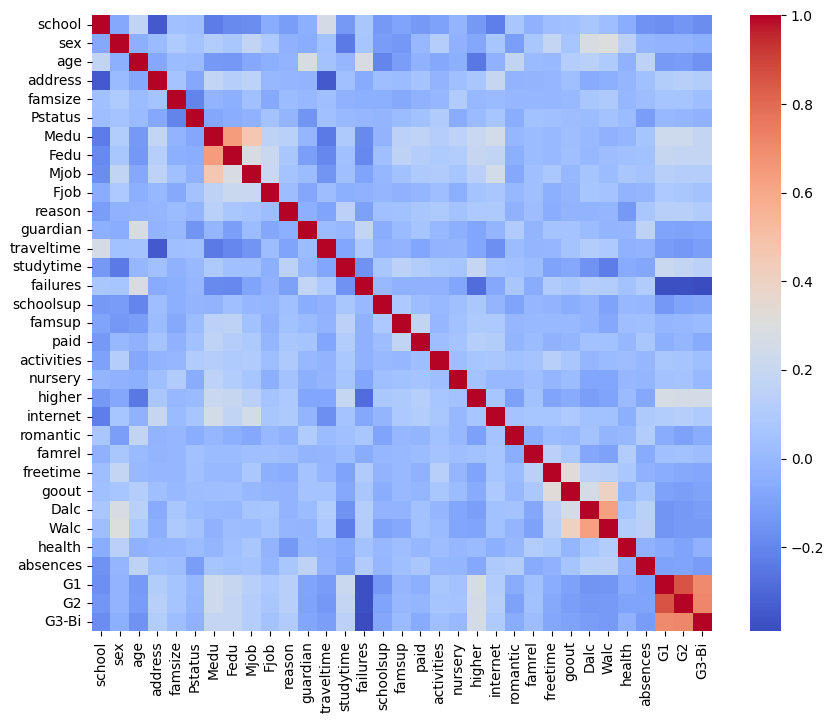

In [54]:
corr_matrix = testing_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sb.heatmap(corr_matrix, cmap='coolwarm', xticklabels=testing_df.columns, yticklabels=testing_df.columns)

Not much correlation amongst varaibles except for G1, G2, and G3-Bi

#### Grid Search to pick best hyper parameters for XGBoost

In [55]:
# splitting data into train/test to be able to test parameters
train_df, test_df = train_test_split(testing_df, test_size=0.3, random_state=7)  # testing_df is the data for stu_perf_models.ipynb
x_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:,-1].values

In [56]:
clf_xg = xgb.XGBClassifier()
#  https://xgboost.readthedocs.io/en/stable/parameter.html
param_grid = {'eta': [0.01, 0.1, 0.2],  # learning rate
              'n_estimators': [100, 500, 1000],  # number of runs model will learn
              'max_depth': [3, 5, 7],  # max depth of a tree
              'subsample': [0.5, 0.8],  # subsample train data
              'colsample_bytree': [0.5, 0.8],  # subsample columns
              'alpha': [0, 1],  # L1 regularization
              'lambda': [0, 1]}  # L2 regularization

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(estimator=clf_xg, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best hyperparameters: {'alpha': 0, 'colsample_bytree': 0.5, 'eta': 0.01, 'lambda': 1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best score: 0.9356164383561645
